In [1]:
import os
import sys
import time
import scipy.io as sio
import numpy as np
import scipy
from scipy.stats import t
from sklearn import svm
import PIL.Image
from spectral import *
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import sklearn
fig_size = plt.rcParams['figure.figsize']
print(plt.rcParams['figure.figsize'])
fig_size[0] = 12.0
fig_size[1] = 9.0
plt.rcParams['figure.figsize'] = fig_size
print(plt.rcParams['figure.figsize'])
print(sklearn.__version__)

[6.0, 4.0]
[12.0, 9.0]
0.19.1


In [3]:
hsi_file_U = '/home/saumo/PaviaU.mat'
gnd_file_U = u'/home/saumo/PaviaU_gt.mat'
data_U = sio.loadmat(hsi_file_U)
img_U = data_U['paviaU'].astype(np.int32)
data1_U = sio.loadmat(gnd_file_U)
gnd_img_U = data1_U['paviaU_gt'].astype(np.int32)
hsi_file = '/home/saumo/Downloads/Pavia.mat'
gnd_file = u'/home/saumo/Downloads/Pavia_gt.mat'
data = sio.loadmat(hsi_file)
img = data['pavia'].astype(np.int32)
data1 = sio.loadmat(gnd_file)
gnd_img = data1['pavia_gt'].astype(np.int32)

In [4]:
np.unique(data1['pavia_gt'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.unique(data1_U['paviaU_gt'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Ground Truth Dimensions for University
(610, 340)


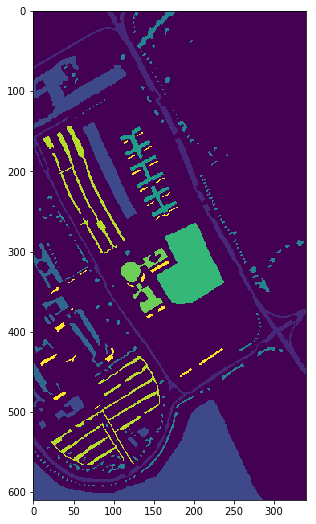

In [6]:
plt.imshow(gnd_img_U)
print("Ground Truth Dimensions for University")
print(gnd_img_U.shape)

Ground Truth Dimensions
(1096, 715)


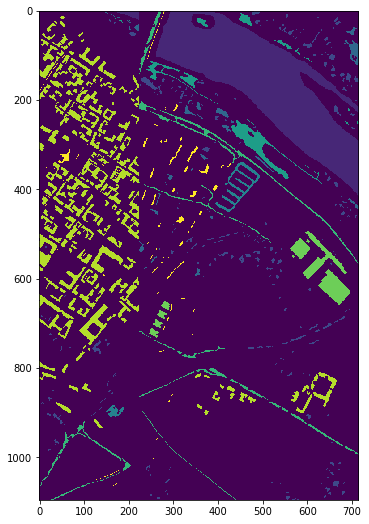

In [7]:
plt.imshow(gnd_img)
print("Ground Truth Dimensions")
print(gnd_img.shape)

In [8]:
print("Dataset Dimensions of University")
print(img_U.shape)
print("Dataset Dimensions")
print(img.shape)

Dataset Dimensions of University
(610, 340, 103)
Dataset Dimensions
(1096, 715, 102)


There are 103 spectras in University scene of which we choose the 101th spectra, giving an image dimension of 610*340
(610, 340)


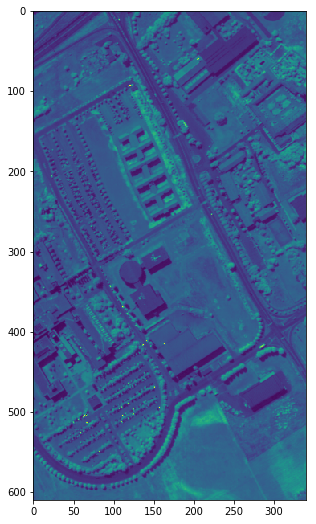

In [9]:
new_arr_U = img_U[0:610, 0:340,100]
print("There are 103 spectras in University scene of which we choose the 101th spectra, giving an image dimension of 610*340")
print(new_arr_U.shape)
plt.imshow(new_arr_U)

There are 102 spectras in scene of which we choose the 101th spectra, giving an image dimension of 1096*715
(1096, 715)


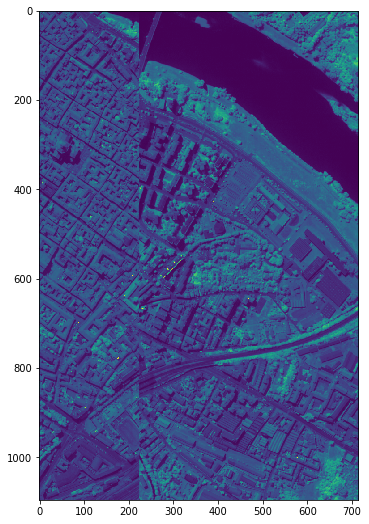

In [10]:
new_arr = img[0:1096, 0:715, 100]
print("There are 102 spectras in scene of which we choose the 101th spectra, giving an image dimension of 1096*715")
print(new_arr.shape)
plt.imshow(new_arr)

# Calculation of CSMSAD Matrix

In [11]:
#deleting first spectrum of Pavia University
img_U = np.delete(img_U, 0, axis=2)

In [12]:
#Pavia Centre
trees = np.asarray(np.where(gnd_img==2)).T.tolist()
asphalt = np.asarray(np.where(gnd_img==3)).T.tolist()
meadows = np.asarray(np.where(gnd_img==8)).T.tolist()
bs = np.asarray(np.where(gnd_img==9)).T.tolist()
bitumen = np.asarray(np.where(gnd_img==5)).T.tolist()
bricks = np.asarray(np.where(gnd_img==4)).T.tolist()
shadow = np.asarray(np.where(gnd_img==7)).T.tolist()

#Pavia University
trees_U = np.asarray(np.where(gnd_img_U==4)).T.tolist()
asphalt_U = np.asarray(np.where(gnd_img_U==1)).T.tolist()
meadows_U = np.asarray(np.where(gnd_img_U==2)).T.tolist()
bs_U = np.asarray(np.where(gnd_img_U==6)).T.tolist()
bitumen_U = np.asarray(np.where(gnd_img_U==7)).T.tolist()
bricks_U = np.asarray(np.where(gnd_img_U==8)).T.tolist()
shadow_U = np.asarray(np.where(gnd_img_U==9)).T.tolist()

In [90]:
sad = 0
for x,y in trees:
    for x_U,y_U in trees_U:
        sad = sad + np.arccos(np.inner(img[x,y,], img_U[x_U,y_U,])/(np.linalg.norm(img[x,y,])*np.linalg.norm(img_U[x_U,y_U,])))
print(sad)

2669802.56843


In [96]:
print(sad/(len(trees)*len(trees_U)))

0.114680900998


# Dictionary learning

In [13]:
Xs = np.asarray(img[trees[0][0], trees[0][1],])
features = [trees, asphalt, meadows, bs, bitumen, bricks, shadow]
for l in features:
    for x,y in l:
        Xs = np.vstack((Xs, np.asarray(img[x,y,])))
Xs = np.delete(Xs, 0, axis=0)
Xs.shape

(72933, 102)

In [14]:
Xt = np.asarray(img_U[trees_U[0][0], trees_U[0][1],])
features_U = [trees_U, asphalt_U, meadows_U, bs_U, bitumen_U, bricks_U, shadow_U]
for l in features_U:
    for x,y in l:
        Xt = np.vstack((Xt, np.asarray(img_U[x,y,])))
Xt = np.delete(Xt, 0, axis=0)
Xt.shape

(39332, 102)

In [41]:
Xs = Xs.astype('float')
Xt = Xt.astype('float')

In [15]:
Xs = np.transpose(Xs)
Xs.shape

(102, 72933)

In [16]:
Xt = np.transpose(Xt)
Xt.shape

(102, 39332)

In [42]:
from sklearn.decomposition import NMF
model = NMF(n_components=6, init='nndsvd', solver='cd', max_iter = 100000, random_state=0)
Ws = model.fit_transform(Xs)
Hs = model.components_
print("Xs")
print(Xs)
print("Ws")
print(Ws)
print("Hs")
print(Hs)
Fs = np.linalg.norm(Xs - np.matmul(Ws,Hs))**2
print(Fs)

Xs
[[  645.   617.   481. ...,   682.   850.   936.]
 [  322.   378.   419. ...,   995.   967.  1145.]
 [  138.   384.   536. ...,  1067.   983.  1132.]
 ..., 
 [ 4540.  4429.  3797. ...,   825.  1379.  1125.]
 [ 4420.  4343.  3721. ...,   804.  1400.  1150.]
 [ 4426.  4328.  3722. ...,   809.  1435.  1160.]]
Ws
[[  0.00000000e+00   4.26765048e+00   4.62657583e+01   1.42350915e+03
    0.00000000e+00   0.00000000e+00]
 [  1.68540573e-01   0.00000000e+00   2.50256646e+01   1.03948716e+03
    2.15515641e+00   4.03752147e+02]
 [  1.41810797e+01   0.00000000e+00   1.66791405e+01   4.25166169e+02
    2.20724717e+00   8.29428616e+02]
 [  2.75582269e+01   8.21296625e-01   4.19936509e+01   1.11180405e+02
    1.58598492e+00   8.86974832e+02]
 [  3.39458544e+01   2.19108781e+00   7.92157056e+01   4.28943486e+01
    5.27963313e-01   7.29578254e+02]
 [  3.55168114e+01   3.25218101e+00   1.08061452e+02   4.82763787e+01
    0.00000000e+00   5.71531293e+02]
 [  3.58647378e+01   3.68963737e+00   1.2634

In [43]:
from sklearn.decomposition import NMF
model = NMF(n_components=6, init='nndsvd', solver='cd', max_iter = 100000, random_state=0)
Wt = model.fit_transform(Xt)
Ht = model.components_
print("Xt")
print(Xt)
print("Wt")
print(Wt)
print("Ht")
print(Ht)
Ft = np.linalg.norm(Xt - np.matmul(Wt,Ht))**2
print(Ft)

Xt
[[  614.   503.   890. ...,   789.   622.   952.]
 [  425.   291.   483. ...,   646.   577.   801.]
 [  450.   307.   309. ...,   547.   593.   752.]
 ..., 
 [ 4438.  4057.  3724. ...,   461.   471.   455.]
 [ 4421.  4081.  3726. ...,   445.   438.   463.]
 [ 4477.  4219.  3767. ...,   432.   424.   462.]]
Wt
[[  1.13849585e+01   8.53453856e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   8.00696932e+02]
 [  1.75736458e+00   1.02989273e+01   1.38212758e+01   4.09912886e+01
    9.56008342e-01   6.46864245e+02]
 [  0.00000000e+00   0.00000000e+00   3.80935469e+01   1.40228989e+02
    4.21653849e+00   3.92338702e+02]
 [  1.85427658e+00   2.34268531e-01   5.24298050e+01   1.84395049e+02
    5.75457194e+00   2.28558694e+02]
 [  4.10839670e+00   1.58179521e+01   5.56207883e+01   1.58812967e+02
    5.47991195e+00   1.57765765e+02]
 [  4.44848739e+00   3.26378014e+01   5.46765297e+01   1.27624180e+02
    5.06823629e+00   1.31042120e+02]
 [  3.83202952e+00   4.63319095e+01   5.2892

In [44]:
(np.linalg.norm(Xs - np.matmul(Wt,Hs))**2/(np.linalg.norm(Xs)**2))*100

34.061719765719289

In [45]:
(np.linalg.norm(Xt - np.matmul(Wt,Ht))**2/(np.linalg.norm(Xt)**2))*100

0.04600122522593867

In [37]:
Ws.shape

(102, 6)

In [38]:
Wt.shape

(102, 6)

In [21]:
Hs.shape

(6, 72933)

In [22]:
Ht.shape

(6, 39332)

In [39]:
D = Wt
Vs = Hs
Vt = Ht

In [40]:
Xs_copy = Xs
Xt_copy = Xt

In [46]:
F = (np.linalg.norm(Xs - np.matmul(D,Vs)))**2 + (np.linalg.norm(Xt - np.matmul(D,Vt)))**2
print(F)

7.92440348469e+12


Iteration 0/1000
2.0433060344e+12
Iteration 1/1000
720197831905.0
Iteration 2/1000
452181555231.0
Iteration 3/1000
405758090144.0
Iteration 4/1000
330046631603.0
Iteration 5/1000
348805406649.0
Iteration 6/1000
297623614285.0
Iteration 7/1000
329336075354.0
Iteration 8/1000
284195484187.0
Iteration 9/1000
319854430707.0
Iteration 10/1000
276844043694.0
Iteration 11/1000
314139662861.0
Iteration 12/1000
272105961437.0
Iteration 13/1000
310237389581.0
Iteration 14/1000
268735899295.0
Iteration 15/1000
307356122007.0
Iteration 16/1000
266180050222.0
Iteration 17/1000
305114575065.0
Iteration 18/1000
264154663305.0
Iteration 19/1000
303306062579.0
Iteration 20/1000
262498922490.0
Iteration 21/1000
301808148300.0
Iteration 22/1000
261114137670.0
Iteration 23/1000
300542903608.0
Iteration 24/1000
259935648073.0
Iteration 25/1000
299457704004.0
Iteration 26/1000
258918740524.0
Iteration 27/1000
298515254137.0
Iteration 28/1000
258031120953.0
Iteration 29/1000
297688093147.0
Iteration 30/1000


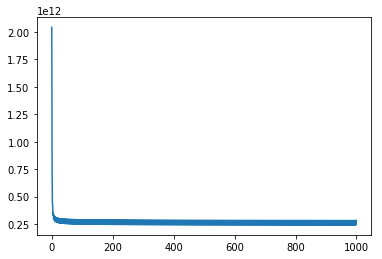

In [47]:
f= []
for i in range(1000):
    #Xs, Xt is fixed, we modify D, Vs, Vt so that F decreases
    Vs_temp = Vs
    Vt_temp = Vt
    Vs = np.divide(np.multiply(Vs, np.matmul(np.transpose(D),Xs)),np.matmul(np.matmul(np.transpose(D),D),Vs))
    Vt = np.divide(np.multiply(Vt, np.matmul(np.transpose(D),Xt)),np.matmul(np.matmul(np.transpose(D),D),Vt))
    D = np.divide(np.multiply(D, (np.matmul(Xs,np.transpose(Vs_temp))+np.matmul(Xt,np.transpose(Vt_temp)))),(np.matmul(np.matmul(D,Vs_temp),np.transpose(Vs_temp))+np.matmul(np.matmul(D,Vt_temp),np.transpose(Vt_temp))))
    F = (np.linalg.norm(Xs - np.matmul(D,Vs)))**2 + (np.linalg.norm(Xt - np.matmul(D,Vt)))**2
    f.append(F)
    print("Iteration {}/{}".format(i, 1000))
    print(F)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams['figure.figsize']=(40,5)
plt.plot(f)

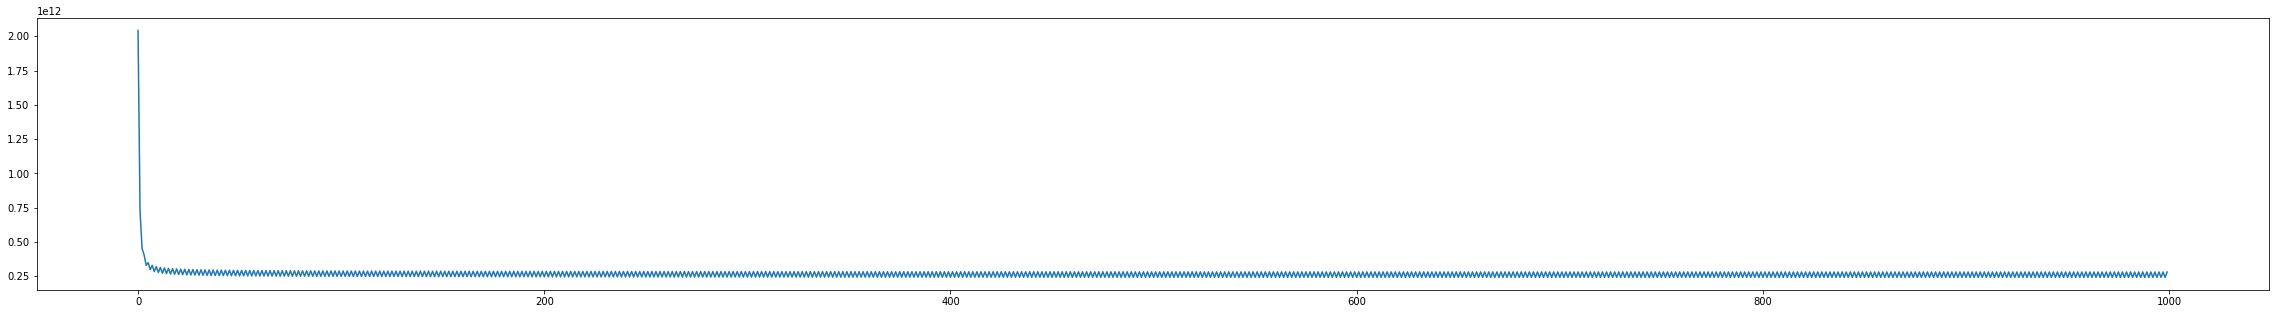

In [48]:
plt.rcParams['figure.figsize']=(40,5)
plt.plot(f)

In [51]:
(F/((np.linalg.norm(Xs))**2 + (np.linalg.norm(Xt))**2))*100

0.83286461548951174

In [52]:
Us, ss, Vs = np.linalg.svd(Xs, full_matrices=0)

In [54]:
#finding p for target
sum1s = np.sum(ss)
sum2s = 0
ps=0
while(1):
    if((sum2s/sum1s)<0.9):
        sum2s = sum2s + ss[ps]
        ps = ps+1
    else :
        print(ps)
        break

6


In [55]:
Ut, st, Vt = np.linalg.svd(Xt, full_matrices=0)

In [56]:
#finding p for target
sum1t = np.sum(st)
sum2t = 0
pt=0
while(1):
    if((sum2t/sum1t)<0.9):
        sum2t = sum2t + st[pt]
        pt = pt+1
    else :
        print(pt)
        break

6
